<a href="https://colab.research.google.com/github/yoshi2210/SoccerAnalytics/blob/main/MovieObjectTracking_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Purpose
This code was intended to demo of the conversion of youtube data to pitch positional data by using YOLO to detect objects and Strong sort to track those.

 I have to note that I skipped general process that I create YOLO learning model for a specific purpose with custimzed labels and use best.pt as weights data for Strong sort with LabelImg or anything to support you to annotate data.

# Introduction

In [ ]:
#@title  Git&pip necessary files and libraries

#@markdown  1. Google drive has an target movie and output directory
from google.colab import drive
drive.mount('/content/drive')

#@markdown  2. Import YoloStrongSort and Yolo at the same time
! git clone --recurse-submodules https://github.com/mikel-brostrom/Yolov5_StrongSORT_OSNet.git
! git submodule update --init
import os
os.chdir('/content/Yolov5_StrongSORT_OSNet')
! pip install -r requirements.txt

#@markdown 3. load Naraya libraries,  In order to avoid error, pillow re install is needed
os.chdir('/content')
!git clone https://github.com/DonsetPG/narya.git
!cd narya && pip3 install -r requirements.txt
! pip install --ignore-installed Pillow==9.0.0

In [ ]:
#@title Modify track.py of StrongSort to have dataframe through txt file
#@markdown  Appply algorithm to an original movie. 
#@markdown You can check all argparse from below readme.md

#@markdown https://github.com/mikel-brostrom/Yolov5_StrongSORT_OSNet

#@markdown Note:If you want txt file to include which class labels are identified, you need to change track.py as follows.  
#@markdown In my case, I changed track.py as below in order to make output txt file converted to dataframe later.

#@markdown https://github.com/mikel-brostrom/Yolov5_StrongSORT_OSNet/issues/55  

import shutil
shutil.copy2("/content/drive/MyDrive/Soccer_analytics/modified_track.py", "/content/Yolov5_StrongSORT_OSNet/modified_track.py")


'/content/Yolov5_StrongSORT_OSNet/modified_track.py'

In [ ]:
ls

drive/  narya/  sample_data/  Yolov5_StrongSORT_OSNet/


# Detection and Tracking

In [ ]:
#@title Run Detector and Tracker, if it doesn't work, re-run will work

os.chdir('/content/Yolov5_StrongSORT_OSNet')

#@markdown  Choose a movie to analyze
movie_source = '/content/drive/MyDrive/Soccer_analytics/video_base.mp4' #@param {type: 'string'}

#@markdown  Exporting video frame by opencv2
import cv2
vidcap = cv2.VideoCapture(movie_source)
success,image = vidcap.read()
count = 0

frame_output_path = '/content/drive/MyDrive/Soccer_analytics/base' #@param {type: 'string'}

img_list = []
while success:
  img_list.append(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  cv2.imwrite(frame_output_path+"/frame%d.jpg" % count, image)     # save frame as JPEG file      
  success,image = vidcap.read()
  print('Read a new frame: ', success)
  print('image path=',frame_output_path+"/frame%d.jpg" % count)
  # image = cv2.imread("/content/drive/MyDrive/Soccer_analytics/frame%d.jpg" % count)   # read frame as cv2
  # 'visualize' is just an imshow
  # plt.figure(figsize=(16, 5))
  # plt.imshow(image)
  count += 1


#@markdown  Appply algorithm to an original movie. 

selected_weights = 'yolov5x.pt'  #@param {type: 'string'}
# ! python modified_track.py --source '/content/drive/MyDrive/Soccer_analytics/video_base.mp4' --yolo-weights yolov5l6.pt --strong-sort-weights osnet_x0_25_market1501.pt --save-vid  --save-txt
! python modified_track.py --source "$movie_source" --yolo-weights "$selected_weights" --strong-sort-weights osnet_x0_25_market1501.pt --save-vid  --save-txt

! python modified_track.py --source "$movie_source" --yolo-weights /content/drive/MyDrive/football_cricket/YOLOv5s_Epoch300_weights/best.pt --strong-sort-weights osnet_x0_25_market1501.pt --save-vid  --save-txt


Read a new frame:  True
image path= /content/drive/MyDrive/Soccer_analytics/base/frame0.jpg
Read a new frame:  True
image path= /content/drive/MyDrive/Soccer_analytics/base/frame1.jpg
Read a new frame:  True
image path= /content/drive/MyDrive/Soccer_analytics/base/frame2.jpg
Read a new frame:  True
image path= /content/drive/MyDrive/Soccer_analytics/base/frame3.jpg
Read a new frame:  True
image path= /content/drive/MyDrive/Soccer_analytics/base/frame4.jpg
Read a new frame:  True
image path= /content/drive/MyDrive/Soccer_analytics/base/frame5.jpg
Read a new frame:  True
image path= /content/drive/MyDrive/Soccer_analytics/base/frame6.jpg
Read a new frame:  True
image path= /content/drive/MyDrive/Soccer_analytics/base/frame7.jpg
Read a new frame:  True
image path= /content/drive/MyDrive/Soccer_analytics/base/frame8.jpg
Read a new frame:  True
image path= /content/drive/MyDrive/Soccer_analytics/base/frame9.jpg
Read a new frame:  True
image path= /content/drive/MyDrive/Soccer_analytics/base

df.ReID.unique()= ['1_person' '2_person' '3_person' '4_person' '5_person' '6_person'
 '7_person' '8_person' '9_person' '10_person' '11_person' '12_person'
 '13_person' '14_person' '15_person' '16_person' '17_person' '20_person'
 '21_sportsball' '22_person' '23_person' '35_person' '44_person'
 '45_person' '46_sportsball' '46_tennisracket' '48_person' '49_person'
 '50_person' '51_person' '52_person' '58_person' '60_person']


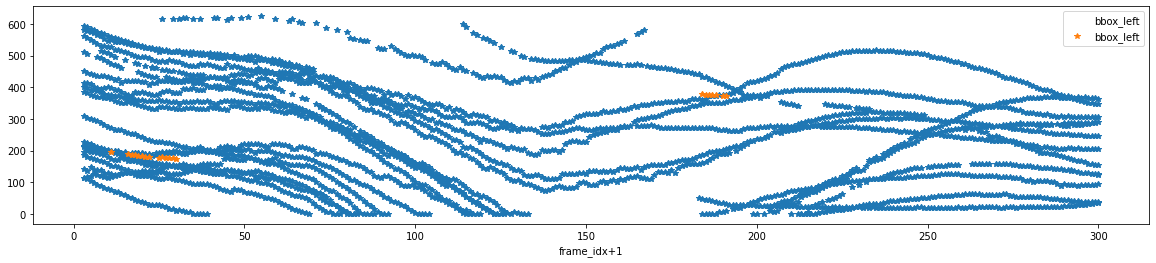

In [ ]:
#@title Txt 2 Datafframe
#@markdown reading exported txt file and creating dataframe 


import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# reading existing files
df1_path = '/content/Yolov5_StrongSORT_OSNet/runs/track/exp2/tracks/video_base.txt' #@param {type: 'string'}
df2_path = '/content/Yolov5_StrongSORT_OSNet/runs/track/exp4/tracks/video_base.txt' #@param {type: 'string'}


# df1 = pd.read_csv('/content/drive/MyDrive/Soccer_analytics/yolov5l6_base_video.csv',encoding='utf-8')
# df2 = pd.read_csv('/content/drive/MyDrive/Soccer_analytics/original_base_video.csv',encoding='utf-8')
#df = pd.read_csv('/content/Yolov5_StrongSORT_OSNet/runs/track/exp2/tracks/goal2.txt',header=None,sep=" ") 
#df = pd.read_csv('/content/Yolov5_StrongSORT_OSNet/runs/track/exp4/tracks/watch_v_44qkG5-RcSk.txt',header=None,sep=" ") 
df1 = pd.read_csv(df1_path,header=None,sep=" ") 
#df2 = pd.read_csv(df2_path,header=None,sep=" ") 
# df1 = pd.read_csv('/content/Yolov5_StrongSORT_OSNet/runs/track/exp/tracks/video_base.txt',header=None,sep=" ") 
# df2 = pd.read_csv('/content/Yolov5_StrongSORT_OSNet/runs/track/exp2/tracks/video_base.txt',header=None,sep=" ") 
# df1 = pd.read_csv('/content/Yolov5_StrongSORT_OSNet/runs/track/exp/tracks/goal3.txt',header=None,sep=" ") 
# df2 = pd.read_csv('/content/Yolov5_StrongSORT_OSNet/runs/track/exp2/tracks/goal3.txt',header=None,sep=" ") 
cols = ['source_path','frame_idx+1','ID','bbox_left','bbox_top','bbox_w','bbox_h','nomean1','nomean2','nomean3','nomean4','nomean5','ReID','conf_val']
df1.columns=cols
df2.columns=cols

df = pd.concat([df1,df2])
# df=df1

print('df.ReID.unique()=',df.ReID.unique())

#@markdown visualize player and ball tracking 
df['sports_ball_flag'] = np.where(df.ReID.str.contains('ball'),'detected','none')
df['person_flag'] = np.where(df.ReID.str.contains('person'),'detected','none')

fig,ax = plt.subplots(figsize=(20,4))
df[df.person_flag =='detected'].plot(x='frame_idx+1',y='bbox_left',ax=ax,style='*')
df[df.sports_ball_flag =='detected'].plot(x='frame_idx+1',y='bbox_left',ax=ax,style='*')


In [ ]:
!apt-get update && apt-get install imagemagick

In [ ]:
df_target.head()

,source_path,frame_idx+1,ID,bbox_left,bbox_top,bbox_w,bbox_h,nomean1,nomean2,nomean3,...,nomean5,ReID,conf_val,sports_ball_flag,person_flag,bbox_left_Hx,bbox_top_Hy,bbox_B,bbox_G,bbox_R
1315,/content/drive/MyDrive/Soccer_analytics/video_...,78,1,94,267,24,55,-1,-1,-1,...,NaN,1_person,0.88,none,detected,495.0,496.0,127.044697,137.243939,104.773485
1316,/content/drive/MyDrive/Soccer_analytics/video_...,78,2,401,164,17,32,-1,-1,-1,...,NaN,2_person,0.85,none,detected,629.0,381.0,123.476103,130.115809,99.981618
1317,/content/drive/MyDrive/Soccer_analytics/video_...,78,3,0,119,0,42,-1,-1,-1,...,NaN,3_person,0.84,none,detected,457.0,317.0,NaN,NaN,NaN
1318,/content/drive/MyDrive/Soccer_analytics/video_...,78,4,20,128,12,32,-1,-1,-1,...,NaN,4_person,0.80,none,detected,469.0,317.0,131.078125,141.104167,108.080729
1319,/content/drive/MyDrive/Soccer_analytics/video_...,78,5,402,93,20,38,-1,-1,-1,...,NaN,5_person,0.78,none,detected,650.0,297.0,127.631579,134.902632,105.917105


In [ ]:
! pip install matplotlib=3.3.0

ERROR: Invalid requirement: 'matplotlib=3.3.0'
Hint: = is not a valid operator. Did you mean == ?


In [ ]:
#@title Homography 
#@markdown 1. load pretrained model and apply pix2pix

os.chdir('/content')
from narya.narya.models.gluon_models import TrackerModel
from narya.narya.utils.vizualization import merge_template
from gluoncv.utils import viz
import tensorflow as tf
import mxnet as mx
ctx = [mx.cpu()]

import numpy as np
import cv2
from matplotlib import pyplot as plt
from narya.narya.utils.vizualization import visualize
from narya.narya.utils.vizualization import rgb_template_to_coord_conv_template

#@markdown 2. load template image of soccer pitch filed
template = cv2.imread('narya/world_cup_template.png')
# if RGB gradation is preffered
#template = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)
template = cv2.resize(template, (1280,720))/255.
template = rgb_template_to_coord_conv_template(template)
# visualize(template=template)

# load homography pre-trained data 
from narya.narya.utils.homography import compute_homography, warp_image,warp_point
from narya.narya.utils.image import torch_img_to_np_img, np_img_to_torch_img, denormalize
from narya.narya.utils.utils import to_torch
import torch

from narya.narya.models.keras_models import DeepHomoModel

deep_homo_model = DeepHomoModel()

WEIGHTS_PATH = (
    "https://storage.googleapis.com/narya-bucket-1/models/deep_homo_model.h5"
)
WEIGHTS_NAME = "deep_homo_model.h5"
WEIGHTS_TOTAR = False

checkpoints = tf.keras.utils.get_file(
                WEIGHTS_NAME, WEIGHTS_PATH, WEIGHTS_TOTAR,
            )

deep_homo_model.load_weights(checkpoints)

# corners = deep_homo_model(image)
# print(corners)
# pred_homo = compute_homography(corners)[0]
# print(pred_homo)

########################################################################################
#@markdown 3. Apply homography and have positional data


#@markdown normalized image size
w = 512 #@param {type: 'integer'} 
h = 512 #@param {type: 'integer'}


#original width and hight image/movie size
height, width, layers = img_list[0].shape
ow=width 
oh=height 

# Dataframe will be stored as data_you_need
data_you_need=pd.DataFrame()


# loop img_list size as it's the size of frame
# note color scale if it's [0 1] or [0 255] 
# https://qiita.com/kotai2003/items/441533e4a59b14c289ba
for frame_num, pre_image in enumerate(img_list):
  if frame_num> 3:
    print('-'*50)
    print('progress={}'.format(frame_num/len(img_list)))

    # slice frame data
    df_target = df1[df1['frame_idx+1']==frame_num]

    # in case we resize image in the future, set a code
    image = cv2.resize(pre_image,(ow,oh))
    image_255 = cv2.resize(image, (ow,oh))/255.

    # check corners for homography
    corners = deep_homo_model(image_255)

    # Calculate arrary H by using detected corners pixel position
    pred_homo = compute_homography(corners)[0]

    
    # pred_wrap2 have converted video data by H^-1 

    H = to_torch(pred_homo) 
    H_np = H.to('cpu').detach().numpy().copy()
    Hinv = to_torch(np.linalg.inv(pred_homo)/np.linalg.inv(pred_homo)[2,2])

    def func_xy(row):  
      # Scale is set as [-0.5 0.5]
      xy = np.array([((row.bbox_left+row.bbox_w/2) *(w/ow)*(1/w)-0.5),( (row.bbox_top + row.bbox_h )*(h/oh)*(1/h)-0.5),1])
      dst = np.matmul(H_np, xy.T)
      
      Hx = dst[0]/dst[2]
      Hy = dst[1]/dst[2]

      # Rescale position to [w h]
      Hx_scaled = np.round(Hx*w+0.5*w)
      Hy_scaled = np.round(Hy*h+0.5*h)
      return pd.Series([Hx_scaled,Hy_scaled])

    df_target[['bbox_left_Hx','bbox_top_Hy']] = df_target.apply(func_xy, axis=1)


    # https://python.atelierkobato.com/mode/
    # RGB data extraction
    def func_color_rgb(row):
      imgBox = image[row.bbox_top:row.bbox_top+row.bbox_h,row.bbox_left:row.bbox_left+row.bbox_w]
      # imgBoxHsv = cv2.cvtColor(imgBox,cv2.COLOR_BGR2HSV)
      if len (imgBox)==0:
        b=0
        g=0
        r=0
      else:
        # make average RGB
        b = imgBox.T[0].flatten().mean()
        g = imgBox.T[1].flatten().mean()
        r = imgBox.T[2].flatten().mean()
      return pd.Series([b,g,r])

    # RGB HSV data extraction
    def func_color_hsv(row):
      imgBox = image[row.bbox_top:row.bbox_top+row.bbox_h,row.bbox_left:row.bbox_left+row.bbox_w]

      # Bbox is shown      
      # fig = plt.figure()
      # plt.imshow(imgBox)

      if len(imgBox)==0 or imgBox.shape[0]==0 or imgBox.shape[1]==0:
        h=0
        s=0
        v=0
      else:
        # print('imgBox_shape',imgBox.shape)
        # print('img_shape',image.shape)
        # print('shape={}'.format(imgBox.shape))
        # print('row.bbox_left={}'.format(row.bbox_left))
        # print('row.bbox_w={}'.format(row.bbox_w))
        # print('row.bbox_top={}'.format(row.bbox_top))
        # print('row.bbox_h={}'.format(row.bbox_h))

        imgBoxHsv = cv2.cvtColor(imgBox, cv2.COLOR_BGR2HSV)
        # fig,ax5=plt.subplots()
        # ax5.imshow(imgBox)
        
        # make average RGB
        h = imgBoxHsv.T[0].flatten().mean()
        s = imgBoxHsv.T[1].flatten().mean()
        v = imgBoxHsv.T[2].flatten().mean()
      return pd.Series([h,s,v])

    #print(df_target.apply(func_color_rgb, axis=1))
    df_target[['bbox_B','bbox_G','bbox_R']] = df_target.apply(func_color_rgb, axis=1)
    df_target[['bbox_H','bbox_S','bbox_V']] = df_target.apply(func_color_hsv, axis=1)

    # append dataset... thought this code sucks...
    data_you_need=data_you_need.append(df_target,ignore_index=True)


    # Visualize results for check
    pred_warp_loop_H = warp_image(np_img_to_torch_img(cv2.resize(image,(w,h))/255),Hinv,method='torch')
    pred_warp_loop_H = torch_img_to_np_img(pred_warp_loop_H[0])
    overlayed_img = merge_template(pred_warp_loop_H,cv2.resize(template, (w,h)))
    
    
    # fig_out,ax_out = plt.subplots()
    # plt.axis('off')
    # plt.xlim([0, w])
    # plt.ylim([0, h])
    # plt.gca().invert_yaxis()
    # ax_out.imshow(overlayed_img)
    # ax_out.scatter(x=df_target['bbox_left_Hx'], y = df_target['bbox_top_Hy'],marker='*',color='b')


  else:
    continue

#@markdown Finally at this cell, data_you_need will have all data



Image shape: (360, 640, 3)


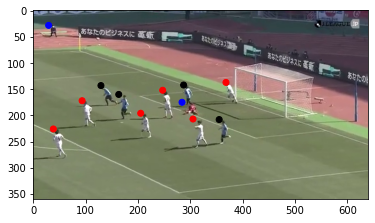

,source_path,frame_idx+1,ID,bbox_left,bbox_top,bbox_w,bbox_h,nomean1,nomean2,nomean3,...,bbox_top_Hy,bbox_B,bbox_G,bbox_R,bbox_H,bbox_S,bbox_V,player_flag,cluster,cluster_color
3432,/content/drive/MyDrive/Soccer_analytics/video_...,296,2,355,208,29,48,-1,-1,-1,...,317.0,115.022270,124.255747,101.269397,70.823994,58.301724,125.882902,1,2,c
3433,/content/drive/MyDrive/Soccer_analytics/video_...,296,5,247,152,21,55,-1,-1,-1,...,251.0,136.009524,139.358442,119.645887,86.067532,43.057143,139.954978,1,1,r
3434,/content/drive/MyDrive/Soccer_analytics/video_...,296,7,205,196,19,47,-1,-1,-1,...,284.0,128.340426,133.856663,114.694289,71.131019,43.243001,134.637178,1,1,r
3435,/content/drive/MyDrive/Soccer_analytics/video_...,296,10,305,207,30,55,-1,-1,-1,...,317.0,134.020606,138.570909,117.443636,77.790303,44.629697,138.828485,1,1,r
3436,/content/drive/MyDrive/Soccer_analytics/video_...,296,14,163,160,29,48,-1,-1,-1,...,240.0,112.614224,122.067529,103.329023,68.119253,58.507184,124.768678,1,2,c


In [ ]:
#@title Team classification 
#@markdown  Pre-process dataframe "data_you_need"

#@markdown 1. Column as person row or not
# creating a column if the row is for person
conditions_player = [
  data_you_need.ReID.str.contains('person')
]

choices_player = [1]
data_you_need['player_flag'] = np.select(conditions_player,choices_player,default=0)

#@markdown 2. Fill N/A with 0
data_you_need.fillna(0)


#@markdown 3. Import libraries
# Boiler plate tools :
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## For modelling :
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Modelling tools :
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score,RandomizedSearchCV,GridSearchCV 

# For hierarchical clustering 
# ! pip install gower
# import gower
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

from scipy.spatial.distance import pdist, squareform ## Calculate distance using pdist and create symmetric matrix 
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram


# For Non-hierarchical clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# x-means
# !pip install pyclustering
# from pyclustering.cluster.xmeans import xmeans
# from pyclustering.cluster import cluster_visualizer
# from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer


#@markdown 4. Choose clustering columns and apply K-means

features = ['bbox_H', 'bbox_S', 'bbox_V'] #'bbox_B', 'bbox_G','bbox_R']
data_p = data_you_need[data_you_need.player_flag==1]


# Clusterinng settings
kmeans = KMeans(n_clusters=3,    # num of clusters
                init = 'k-means++',# select k-means ++ method
                # init = 'random', # select a centroid ramdomly 
                n_init = 10,   # num of kmeans algorithm for different initial centroids
                max_iter = 300,  # nnum of max iteration for each kmeand algorithm
                tol = 1e-4,      # defiened errod as convergence
                random_state=0)  # state that is used ramdom genereator for initialize centrid 

clusters = kmeans.fit(data_p[features].values)


# Clustering data
Cluster_results = data_p
Cluster_results['cluster'] = clusters.labels_

# Check clustering
Cluster_results.groupby('cluster').count().iloc[:,1]


#@markdown 5. Visualize results to check cluster by pointing frame_num
colors = {0: 'b',    1: 'r',      2: 'k',        3: 'c',     4: 'm',     5:'y'}



frame_num=295 #@param {type: 'integer'} 
image = img_list[frame_num+1]
print("Image shape: {}".format(image.shape))
plt.imshow(image)
plt.scatter(x=Cluster_results[Cluster_results['frame_idx+1']==frame_num+1].bbox_left, y=Cluster_results[Cluster_results['frame_idx+1']==frame_num+1].bbox_top, color = [colors[r] for r in Cluster_results[Cluster_results['frame_idx+1']==frame_num+1]['cluster']])
plt.show()



# cluster color for mapping

conditions_color = [
  Cluster_results.cluster==0,
  Cluster_results.cluster==1
]

choices_color = ['y','r']

Cluster_results['cluster_color'] = np.select(conditions_color,choices_color,default='c')

Cluster_results[Cluster_results['frame_idx+1']==frame_num+1].head()


In [ ]:
#@title Raw homography video

# cluster color for mapping

conditions_color = [
  Cluster_results.cluster==0,
  Cluster_results.cluster==1
]

choices_color = ['y','r']

Cluster_results['cluster_color'] = np.select(conditions_color,choices_color,default='c')

Cluster_results[Cluster_results['frame_idx+1']==frame_num+1].head()


output_mp4_path = '/content/drive/MyDrive/Soccer_analytics/20220624/anim.mp4' #@param {type: 'string'} 
output_gif_path = '/content/drive/MyDrive/Soccer_analytics/20220624/anim.gif' #@param {type: 'string'} 


#@markdown exported video size

# w was defined at previous cell as a scale of homoggraphy
# h was defined at previous cell as a scale of homography
video_w = 1050 #@param {type: 'integer'} 
video_h = 680  #@param {type: 'integer'}

#original width and hight image/movie size
height, width, layers = img_list[0].shape
ow = width 
oh = height 


# re design template
template = cv2.imread('narya/world_cup_template.png')
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

fig_out,ax_out = plt.subplots()
plt.axis('off')
plt.xlim([0, video_w])
plt.ylim([0, video_h])
plt.gca().invert_yaxis()
plt.imshow(cv2.resize(template,(video_w,video_h)))
plt.gray()
fig_out.subplots_adjust(left=0, right=1, bottom=0, top=1) #この1行を入れる

ims = []

# https://qiita.com/shinmura0/items/ed96863281637e4fa10c

for frame_num, pre_image in enumerate(img_list):
  if frame_num> 3:
    # print('-'*50)
    # print('progress={}'.format(frame_num/len(img_list)))

    # # slice frame data
    df_video_slice = Cluster_results[Cluster_results['frame_idx+1']==frame_num]


    im = plt.scatter(x=df_video_slice['bbox_left_Hx']*video_w/w, y = df_video_slice['bbox_top_Hy']*video_h/h,marker='*',c=df_video_slice.cluster_color)
    ims.append([im])

  else:
    continue

ani = animation.ArtistAnimation(fig_out, ims, interval=50)
ani.save(output_gif_path, writer="imagemagick")
ani.save(output_mp4_path, writer="ffmpeg")
plt.show()


In [ ]:
#@title Combine movie into 1 movie

import cv2
 
# 2つの画像を横に連結する関数
def image_hcombine(im_info1, im_info2):
    img1 = im_info1[0]                       # 1つ目の画像
    img2 = im_info2[0]                       # 2つ目の画像
    color_flag1 = im_info1[1]                # 1つ目の画像のカラー/グレー判別値
    color_flag2 = im_info2[1]                # 2つ目の画像のカラー/グレー判別値
 
    # 1つ目の画像に対しカラーかグレースケールかによって読み込みを変える
    if color_flag1 == 1:
        h1, w1, ch1 = img1.shape[:3]         # 画像のサイズを取得（グレースケール画像は[:2]
    else:
        h1, w1 = img1.shape[:2]
 
    # 2つ目の画像に対しカラーかグレースケールかによって読み込みを変える
    if color_flag2 == 1:
        h2, w2, ch2 = img2.shape[:3]         # 画像のサイズを取得（グレースケール画像は[:2]
    else:
        h2, w2 = img2.shape[:2]
 
    # 2つの画像の縦サイズを比較して、大きい方に合わせて一方をリサイズする
    if h1 < h2:                              # 1つ目の画像の方が小さい場合
        w1 = w1 #int((h2 / h1) * w2) # 縦サイズの変化倍率を計算して横サイズを決定する
        h1 = h2                              # 小さい方を大きい方と同じ縦サイズにする
        img1 = cv2.resize(img1, (w1, h1))    # 画像リサイズ
    else:                                    # 2つ目の画像の方が小さい場合
        h2 = h1                              # 小さい方を大きい方と同じ縦サイズにする
        w2 = w1 #int((h1 / h2) * w1)             # 縦サイズの変化倍率を計算して横サイズを決定する
        img2 = cv2.resize(img2, (w2, h2))    # 画像リサイズ
 
    img = cv2.hconcat([img1, img2])          # 2つの画像を横方向に連結
    return img
 
# 動画を空間方向に連結させる関数
def m_space_hcombine(movie1, movie2, path_out, scale_factor):
    path1 = movie1[0]                                       # 1つ目の動画のパス
    path2 = movie2[0]                                       # 2つ目の動画のパス
    color_flag1 = movie1[1]                                 # 1つ目の動画がカラーかどうか
    color_flag2 = movie2[1]                                 # 2つ目の動画がカラーかどうか
 
    # 2つの動画の読み込み
    movie1_obj = cv2.VideoCapture(path1)
    movie2_obj = cv2.VideoCapture(path2)
 
    # ファイルからフレームを1枚ずつ取得して動画処理後に保存する
    i = 0                                                   # 第1ループ判定用指標
    while True:
        ret1, frame1 = movie1_obj.read()                    # 1つ目の動画のフレームを取得
        ret2, frame2 = movie2_obj.read()                    # 2つ目の動画のフレームを取得
        check = ret1 and ret2                               # 2つのフレームが共に取得できた時だけTrue（論理演算）
        if check == True:
            im_info1 = [frame1, color_flag1]                # 画像連結関数への引数1
            im_info2 = [frame2, color_flag2]                # 画像連結関数への引数2
 
            frame_mix = image_hcombine(im_info1, im_info2)  # 画像連結関数の実行
 
            if i == 0:
                # 動画ファイル保存用の設定
                fps = int(movie1_obj.get(cv2.CAP_PROP_FPS))                 # 元動画のFPSを取得
                fps_new = int(fps * scale_factor)                           # 動画保存時のFPSはスケールファクターをかける
                frame_size = frame_mix.shape[:3]                            # 結合したフレームのサイズを得る
                h = frame_size[0]                                           # フレームの高さサイズを取得
                w = frame_size[1]                                           # フレームの横サイズを取得
                fourcc = cv2.VideoWriter_fourcc('m', 'p', '4', 'v')         # 動画保存時のfourcc設定（mp4用）
                video = cv2.VideoWriter(path_out, fourcc, fps_new, (w, h))  # 保存動画の仕様
                i = i + 1                                                   # 初期ループ判定用指標を増分
            else:
                pass
            video.write(frame_mix)                                          # 動画を保存する
        else:
            break
 
    # 動画オブジェクトの解放
    movie1_obj.release()
    movie2_obj.release()
    return
 
# ここからメイン実行文

left_movie_path  = '/content/drive/MyDrive/Soccer_analytics/20220624/anim.mp4' #@param {type: 'string'}
right_movie_path  = '/content/drive/MyDrive/Soccer_analytics/video_base.mp4'#@param {type: 'string'}

movie1 = ['/content/drive/MyDrive/Soccer_analytics/20220624/anim.mp4', False]     # 元動画のパス1, カラーはTrue
movie2 = ['/content/drive/MyDrive/Soccer_analytics/video_base.mp4', False]    # 元動画のパス2, 白黒はFalse
path_out = '/content/drive/MyDrive/Soccer_analytics/movie_out.mp4'        #@param {type: 'string'} # 保存する動画のパス
scale_factor = 1                  # FPSにかけるスケールファクター

# 複数動画を連結させる関数を実行
m_space_hcombine(movie1, movie2, path_out, scale_factor)